# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

In [1]:
from fastai import *
from fastai.vision import *

Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

You will need to run this line once per each category.

## Download images

In [10]:
folders = ['flat_rack','general','refrigerated','open_top']
files = ['flat_rack.txt','general.txt','refrigerated.txt','open_top.txt']


In [17]:
path = Path('data/container-type')
for file, folder in zip(files, folders):
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=200)

Error x-raw-image:///e1001a0cb7c8c0d14540b2fddd4409846dc6e31ddd61b39f98bda1213b05572a No connection adapters were found for 'x-raw-image:///e1001a0cb7c8c0d14540b2fddd4409846dc6e31ddd61b39f98bda1213b05572a'
Error http://www.shippingcontainers24.com/wp-content/uploads/2011/11/flatrack_container.jpg HTTPConnectionPool(host='www.shippingcontainers24.com', port=80): Max retries exceeded with url: /wp-content/uploads/2011/11/flatrack_container.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f2298616c50>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))
Error x-raw-image:///f1b719f9023419e7ba77a2df8651041d4b0e0613a5f5075167219f675fcbf74e No connection adapters were found for 'x-raw-image:///f1b719f9023419e7ba77a2df8651041d4b0e0613a5f5075167219f675fcbf74e'


Error https://www.searates.com/design/images/reference/ref.gif HTTPSConnectionPool(host='www.searates.com', port=443): Max retries exceeded with url: /design/images/reference/ref.gif (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')])")))


Error https://www.searates.com/design/images/reference/7.jpg HTTPSConnectionPool(host='www.searates.com', port=443): Max retries exceeded with url: /design/images/reference/7.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')])")))
Error http://www.durabac.net/assets/images/groups/34-contenant-roll-off-robuste-open-top-heavy-duty-container.jpg HTTPConnectionPool(host='www.durabac.net', port=80): Max retries exceeded with url: /assets/images/groups/34-contenant-roll-off-robuste-open-top-heavy-duty-container.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f22986256a0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))
Error https://www.zim.com/media/1873/container_open-top.jpg?anchor=center&mode=crop&width=800&height=500&rnd=131654525670000000 HTTPSConnectionPool(host='www.zim.com', port=443): Read timed out. (read timeout=4)
Error ht

In [18]:
classes = folders.copy();classes

['flat_rack', 'general', 'refrigerated', 'open_top']

In [19]:
# If you have problems download, try with `max_workers=0` to see exceptions:
# download_images(path/file, dest, max_pics=20, max_workers=0)

Then we can remove any images that can't be opened:

In [47]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

flat_rack


general


refrigerated


/home/mediumnok/.conda/envs/fastai/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:771: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


open_top


## View data

In [21]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [22]:
data.classes

['general', 'flat_rack', 'open_top', 'refrigerated']

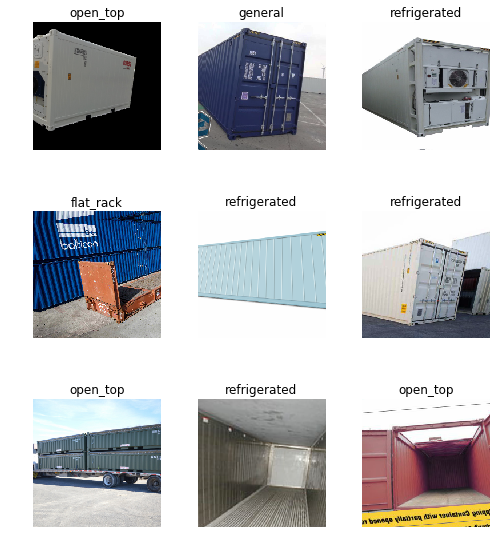

In [24]:
data.show_batch(rows=3, figsize=(7,8))

In [25]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['general', 'flat_rack', 'open_top', 'refrigerated'], 4, 672, 167)

## Train model

In [26]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [27]:
learn.fit_one_cycle(4)

Total time: 01:06
epoch  train_loss  valid_loss  error_rate
1      1.510382    0.892120    0.347305    (00:17)
2      1.259073    0.821664    0.311377    (00:16)
3      1.067757    0.853298    0.323353    (00:16)
4      0.965191    0.858322    0.317365    (00:16)



In [28]:
learn.save('stage-1')

In [29]:
learn.unfreeze()

In [30]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


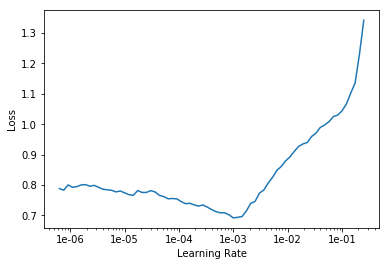

In [32]:
learn.recorder.plot()

In [33]:
learn.fit_one_cycle(3, max_lr=slice(3e-5,3e-4))

Total time: 00:52
epoch  train_loss  valid_loss  error_rate
1      0.776085    0.867963    0.341317    (00:17)
2      0.736771    0.933992    0.323353    (00:17)
3      0.648425    0.947631    0.329341    (00:17)



In [34]:
learn.save('stage-2')

## Interpretation

In [35]:
learn.load('stage-2')

ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7f22985fc4a8>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1

In [36]:
interp = ClassificationInterpretation.from_learner(learn)

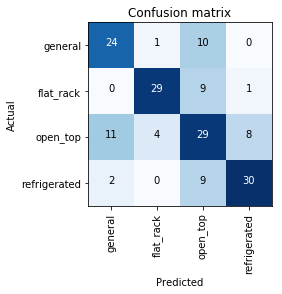

In [37]:
interp.plot_confusion_matrix()

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `FileDeleter` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

First we need to get the file paths from our top_losses. Here's a handy function that pulls out all our top_losses:

In [38]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

Now we can pass in these paths to our widget.

In [40]:
fd = ImageDeleter(data, idxs)


'No images to show :)'

Flag photos for deletion by clicking 'Delete'. Then click 'Confirm' to delete flagged photos and keep the rest in that row. The `File_Deleter` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses`.

In [81]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.99,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [82]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [83]:
learn.load('stage-2')

ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7f229175cf28>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1

In [84]:
ClassificationInterpretation.from_learner(learn)

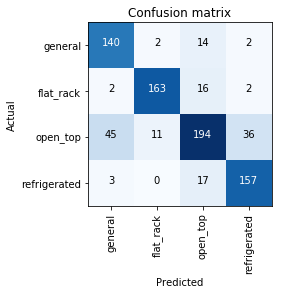

In [85]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [86]:
losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

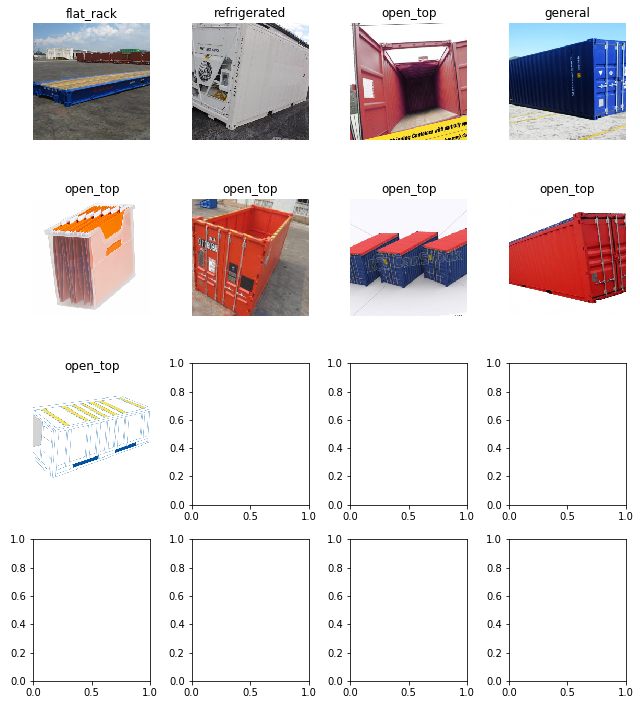

In [87]:
data.classes
data.show_batch(4)

In [92]:
len(set(idxs))

804

In [96]:
data.ds

ImageClassificationBase of len 9

In [93]:
data

In [89]:
fd = ImageDeleter(data.valid_ds, idxs)


Button(button_style='primary', description='Confirm', style=ButtonStyle())

# Retrain

In [98]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
learn = create_cnn(data, models.resnet34, metrics=error_rate)
learn.load('stage-2')

ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7f22914ee898>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1

In [99]:
learn.unfreeze()

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [100]:
learn.fit_one_cycle(1, max_lr=slice(1e-5,1e-4))
learn.save('stage-3-containers')

Total time: 00:17
epoch  train_loss  valid_loss  error_rate
1      0.641898    0.503014    0.158228    (00:17)



In [124]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(4)

TypeError: Traceback (most recent call last):
  File "/home/mediumnok/.conda/envs/fastai/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 138, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/mediumnok/.conda/envs/fastai/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 138, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/mediumnok/fastai/fastai/vision/data.py", line 237, in __getitem__
    x,y = self.ds[idx]
  File "/home/mediumnok/fastai/fastai/basic_data.py", line 49, in __getitem__
    x = self._get_x(i)
  File "/home/mediumnok/fastai/fastai/basic_data.py", line 44, in _get_x
    def _get_x(self,i):   return self.x[i]
TypeError: 'NoneType' object is not subscriptable


In [102]:
losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [103]:
fd = ImageDeleter(data.valid_ds, idxs)

Button(button_style='primary', description='Confirm', style=ButtonStyle())

## Putting your model in production

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [ ]:
# fastai.defaults.device = torch.device('cpu')

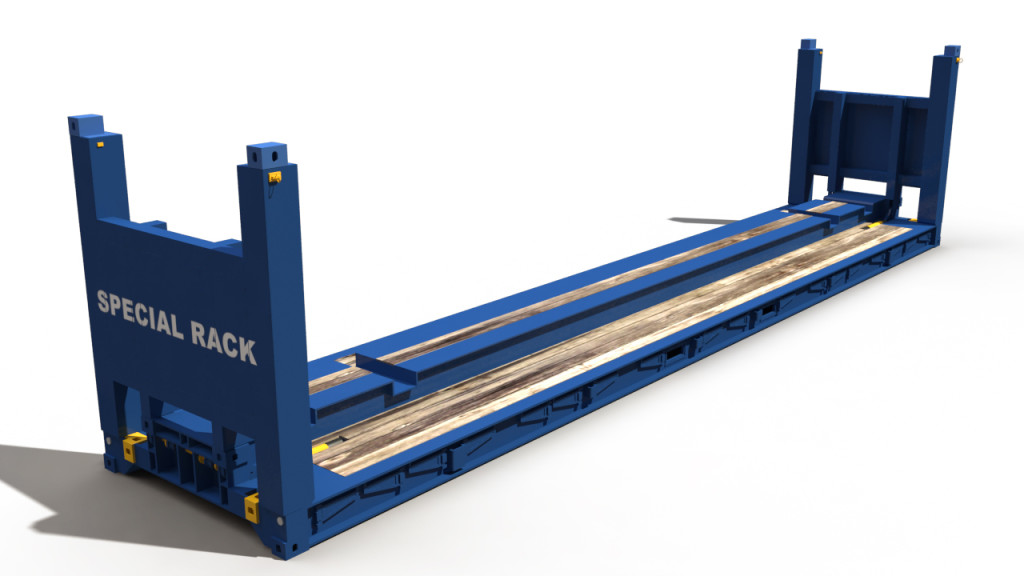

In [137]:
img = open_image(path/'flat_rack'/'00000029.jpg')
img

In [138]:
classes

['general', 'flat_rack', 'open_top', 'refrigerated']

In [139]:
classes = data.classes.copy()
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-3-containers')

ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7f22912f4518>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1

In [140]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

'flat_rack'

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)